In [5]:
from transformers import BertModel, BertTokenizer
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


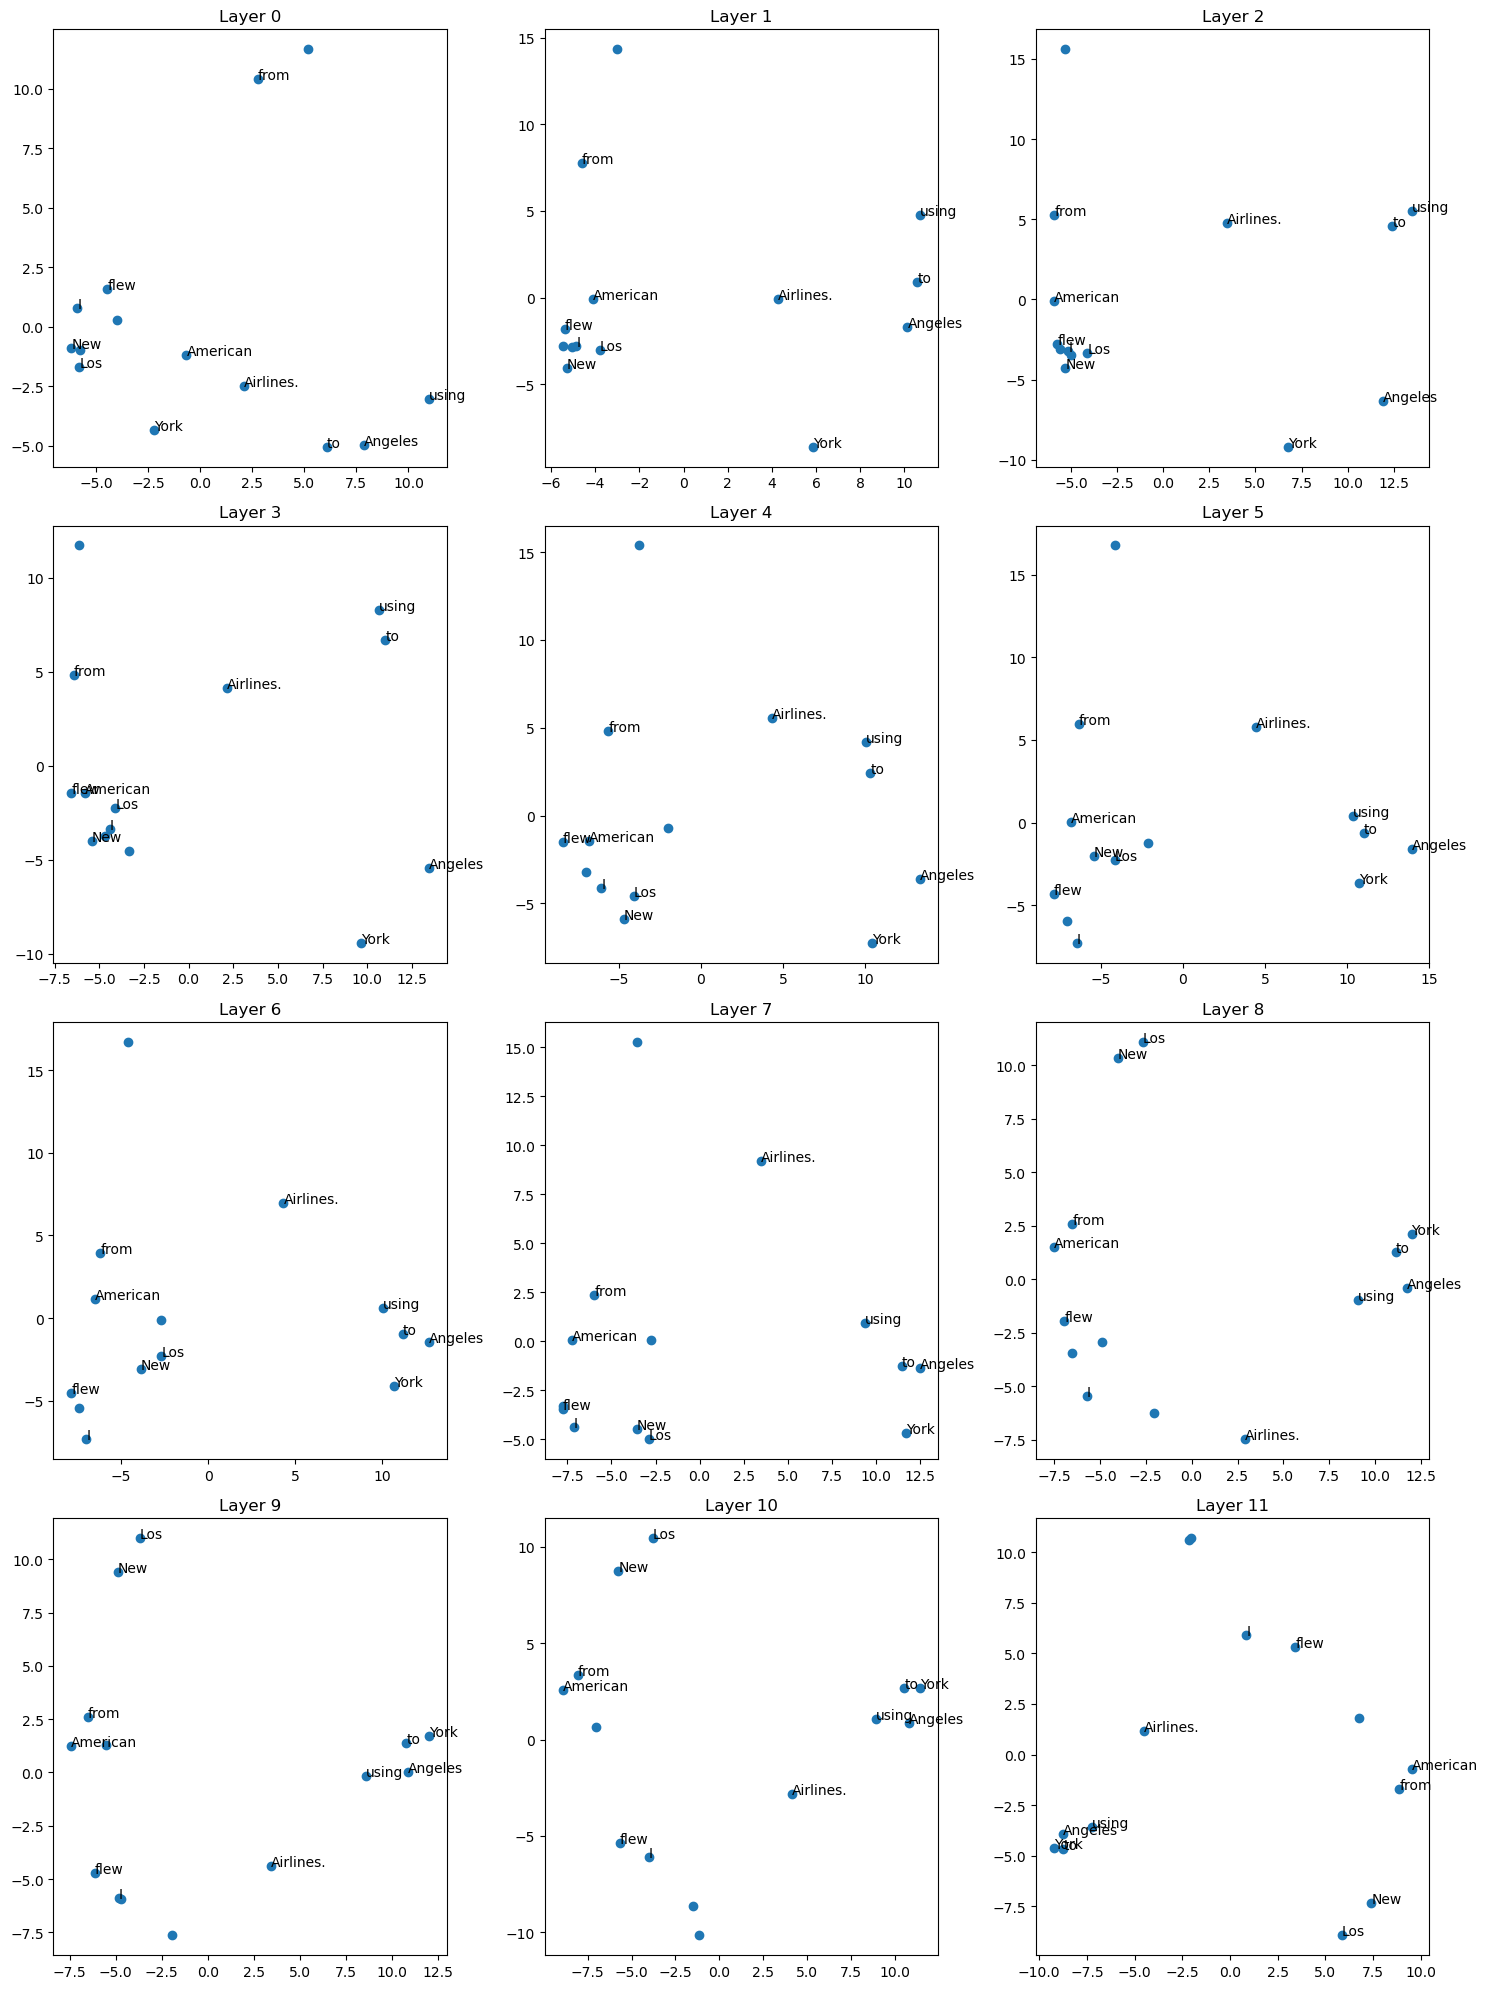

In [6]:

# Initialize the tokenizer and the model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)

input_text = "I flew from New York to Los Angeles using American Airlines."
inputs = tokenizer(input_text, return_tensors='pt')

# Run the text through the model
outputs = model(**inputs)

# Access the hidden states (one for each layer)
hidden_states = outputs.hidden_states

fig, axs = plt.subplots(4, 3, figsize=(15, 20))

for layer in range(12):
    # Get the embeddings from the current layer
    layer_embeddings = hidden_states[layer][0]

    # Convert the embeddings to numpy array
    embeddings_np = layer_embeddings.detach().numpy()

    # Use PCA to reduce the dimensionality to 2D
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings_np)

    # Plot the 2D embeddings
    ax = axs[layer // 3, layer % 3]
    ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
    for i, word in enumerate(input_text.split()):
        ax.annotate(word, xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]))
    ax.set_title(f'Layer {layer}')

plt.tight_layout()
plt.show()



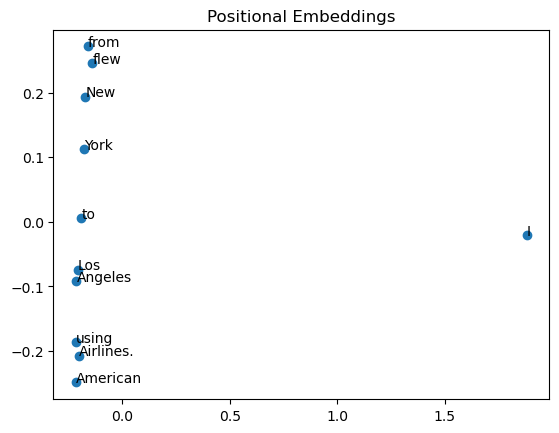

In [8]:
# Get the positional embeddings
positional_embeddings = model.embeddings.position_embeddings.weight.detach().numpy()

# Define your sentence
input_text = "I flew from New York to Los Angeles using American Airlines."

# Select the embeddings corresponding to the positions of the words in your sentence
sentence_length = len(input_text.split())
selected_embeddings = positional_embeddings[:sentence_length]

# Use PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
selected_embeddings_2d = pca.fit_transform(selected_embeddings)

# Plot the 2D embeddings
plt.scatter(selected_embeddings_2d[:, 0], selected_embeddings_2d[:, 1])
for i, word in enumerate(input_text.split()):
    plt.annotate(word, xy=(selected_embeddings_2d[i, 0], selected_embeddings_2d[i, 1]))
plt.title('Positional Embeddings')
plt.show()